# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**2307AC_Team_NM2**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

#### Team Members
1. Mashoto Kgasago
2. Ngokoana Mokakabye
3. Mkhosi Kenny Mdolomba
4. Hlawukelani Rikhotso
5. Amanda Sibanda
6. Ninamukovhe Tshivhase

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

# Introduction

In the realm of data analysis, regression acts as a guiding light. It's a mathematical tool that helps us identify patterns in data, much like connecting the dots on a chart. One of the fundamental forms is linear regression, often represented by the formula:


 ### y = mx + b


Here,y represents the dependent variable, x the independent variable,m the slope derived from the data, and b the intercept.

This method enables us to uncover relationships between different variables and make informed predictions about future outcomes. By understanding these patterns, we gain valuable insights that drive decision-making in various fields.

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |
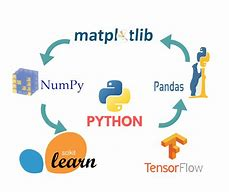
---

### Importing Essential Libraries

To embark on our journey of data analysis and predictive modeling for the Electricity Shortfall Challenge, we rely on a set of powerful libraries that form the backbone of our data-driven exploration. Let's briefly discuss these libraries:

Pandas: This library is our Swiss army knife for data manipulation. It allows us to load, clean, and transform data effortlessly, providing a solid foundation for our analysis.

NumPy: For numerical operations, NumPy is indispensable. It empowers us to perform mathematical operations on our data efficiently.

Matplotlib and Seaborn: These visualization libraries enable us to create insightful plots and graphs, helping us visualize trends and patterns in the data.

Scikit-Learn (sklearn): This is our workhorse for data preparation and modeling. It offers an array of tools for splitting data, scaling features, building regression models, and evaluating their performance.

In [14]:
# Libraries for data loading, data manipulation and data visulisation
import  pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns 
import lightgbm as lgb

from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Libraries for data preparation and model building
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer #required to run iterative imputer
from sklearn.impute import IterativeImputer #imputes missing missing data
from sklearn.model_selection import cross_val_score
from pycaret.regression              import * #for best model selection
from sklearn.metrics                 import mean_squared_error #used to calculate MSE then RMSE
from sklearn.feature_selection       import RFE #Recursive feature selection
from sklearn.ensemble                import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor #regressors for model building
from sklearn.model_selection         import train_test_split #to split data for training
from sklearn.model_selection         import train_test_split
from sklearn.metrics                 import mean_squared_error


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42 


#Remove Red warnings
import warnings
warnings.filterwarnings('ignore')

random_state_global = 42
num_estimators = 100
feature_selection_threshold = 1
max_depth=18

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
 
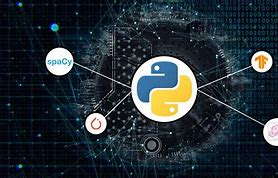
---

Our journey begins with data – the raw material for our analysis and modeling. We'll start by loading the data from the df_train file into a Pandas DataFrame. This tabular structure will serve as our canvas for exploration and model creation.

In [5]:
#load the data
df_train = pd.read_csv("df_train.csv",low_memory=False, parse_dates=['time'])
df_train.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667


In [6]:
#load the data
df_test = pd.read_csv("df_test.csv", low_memory=False, parse_dates=['time'])
df_test.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
In our quest to unveil the hidden insights within our dataset, we embark on a journey known as Exploratory Data Analysis (EDA). This crucial phase allows us to understand, visualize, and draw preliminary conclusions from our data before diving into modeling.
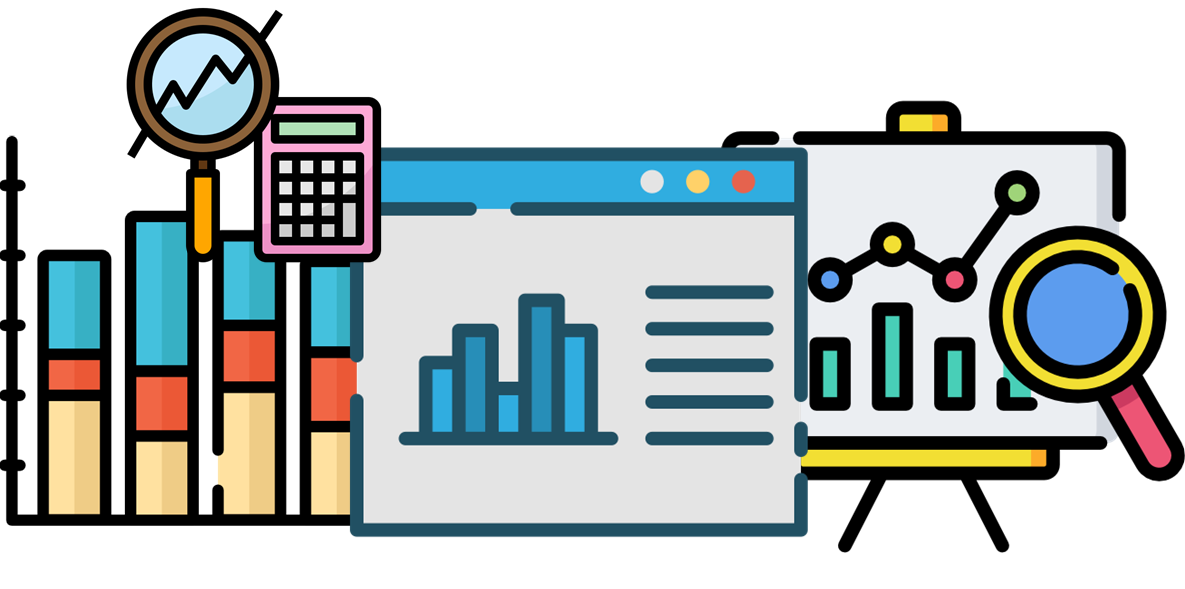
---

#### Data Exploration:¶
We begin by inspecting the dataset to comprehend its structure and contents. This involves checking the number of rows and columns, identifying variable types, and assessing the presence of missing data.

#### EDA
- The main purpose of this is to investigate what’s given using objective techniques requiring no assumptions 
- Features to be used for for categorical (nominal/ordinal) is histograms, density plot, bar plot
- Features to be used for numerical (continuous) is box plot (also important for determining outliers 
- Existing features can be examined under a closer scope on how they all relate (correlation metrics), this depends on the data given and how a story can best be told using pair plots, bubble plots and scatter plots
- Data shapes, value ranges, central tendencies, correlations and class distribution is what EDA is designed for

In [7]:
# looking at into dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   object        
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

>The info command shows our categorical and numerical features. If a feature (variable) is categorical the Dtype is object and if it is a numerical variable the Dtype is an int64 or float64. In data cleaning we fix our data so that it is  all numerical so that it is suitable for modelling

In [8]:
# look at the columns in the data set, the train set and test have same columns
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

> Our dataset shows columns for different weather  conditions, temperature across the different cities of spain

In [9]:
# look at data statistics
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


> Our command returns the descriptives statistics of each feature these are the mean, standard deviation (std) and a five number summary of each numerical feature. The five number summary (Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum) 
The target variable Load shortfall, The difference between the energy generated by  different energy sources partitioned in three-hour window

In [10]:
# Checking missing values/null values  in test data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_training_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_training_data.head()

,Total,Percent
Valencia_pressure,2068,0.235992
Unnamed: 0,0,0.000000
Madrid_weather_id,0,0.000000
Bilbao_pressure,0,0.000000
Seville_weather_id,0,0.000000


In [11]:
# # Checking missing values/null values  in test data
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_training_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_training_data.head()

,Total,Percent
Valencia_pressure,454,0.155479
Unnamed: 0,0,0.000000
time,0,0.000000
Barcelona_weather_id,0,0.000000
Bilbao_pressure,0,0.000000


> There is 23,6% missing data in the train data and 15.5% in the test data, both from valencia_pressure, this will be one of the columns to focusing during the data cleaning stage`

#### Additional statistical: kurtosis and skew.
>Skew indicates the symmetry of the data and is interpreted below
- -0.5 < x < 0.5	Fairly Symmetrical  
- -1 < x < -0.5	Moderate Negative Skew 
- 0.5 < x < 1	Moderate Positive Skew;
- x < -1	High Negative Skew
- x > 1	High Positve Skew


In [15]:
# look at data statistics
df_train.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

>Kurtosis (below) is the measure of outliers present in the data. High kurtosis (>3) is an indication of a large number of outliers and low kurtosis (<3) a lack of outliers

In [16]:
# look at data statistics
df_train.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

> Columns Barcelona_rain_1h , Seville_rain_1h ,Bilbao_snow_3h ,Barcelona_pressure, Seville_rain_3h, Madrid_rain_1h, 
Barcelona_rain_3h, Valencia_snow_3h Bilbao_rain_1h and Valencia_wind_speed  have high number of outliers.
this tells us that we will need to clean our data and to perform some form of standardisation of data before we train our model 

#### Creating visualisations of Univariate analyses
Because the dataset has a lot of variable, the visuals will be limited to a few cities and features

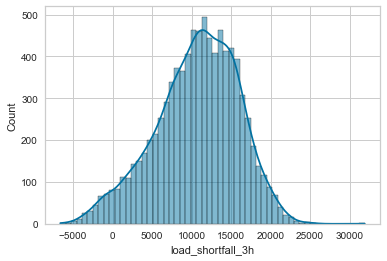

In [17]:
# Distribution of the target variable
sns.histplot(x='load_shortfall_3h', data=df_train, kde=True);


> The distribution of the target variable data seems to be normall

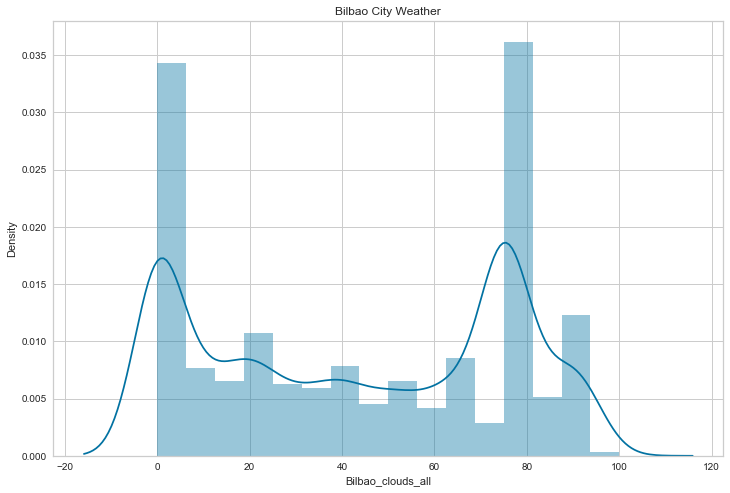

In [18]:
#Checking cloud coverage in Bilboa
fig = plt.figure(figsize=(12, 8))
sns.distplot(df_train['Bilbao_clouds_all'])
plt.title('Bilbao City Weather')
plt.show()

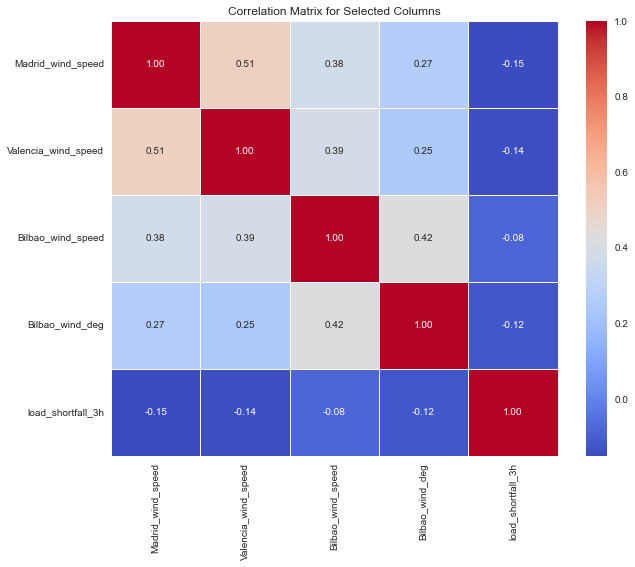

In [19]:
selected_columns = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Bilbao_wind_deg', 'load_shortfall_3h']
numeric_columns = df_train[selected_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Selected Columns')
plt.show()

## Looking at Feature distribution

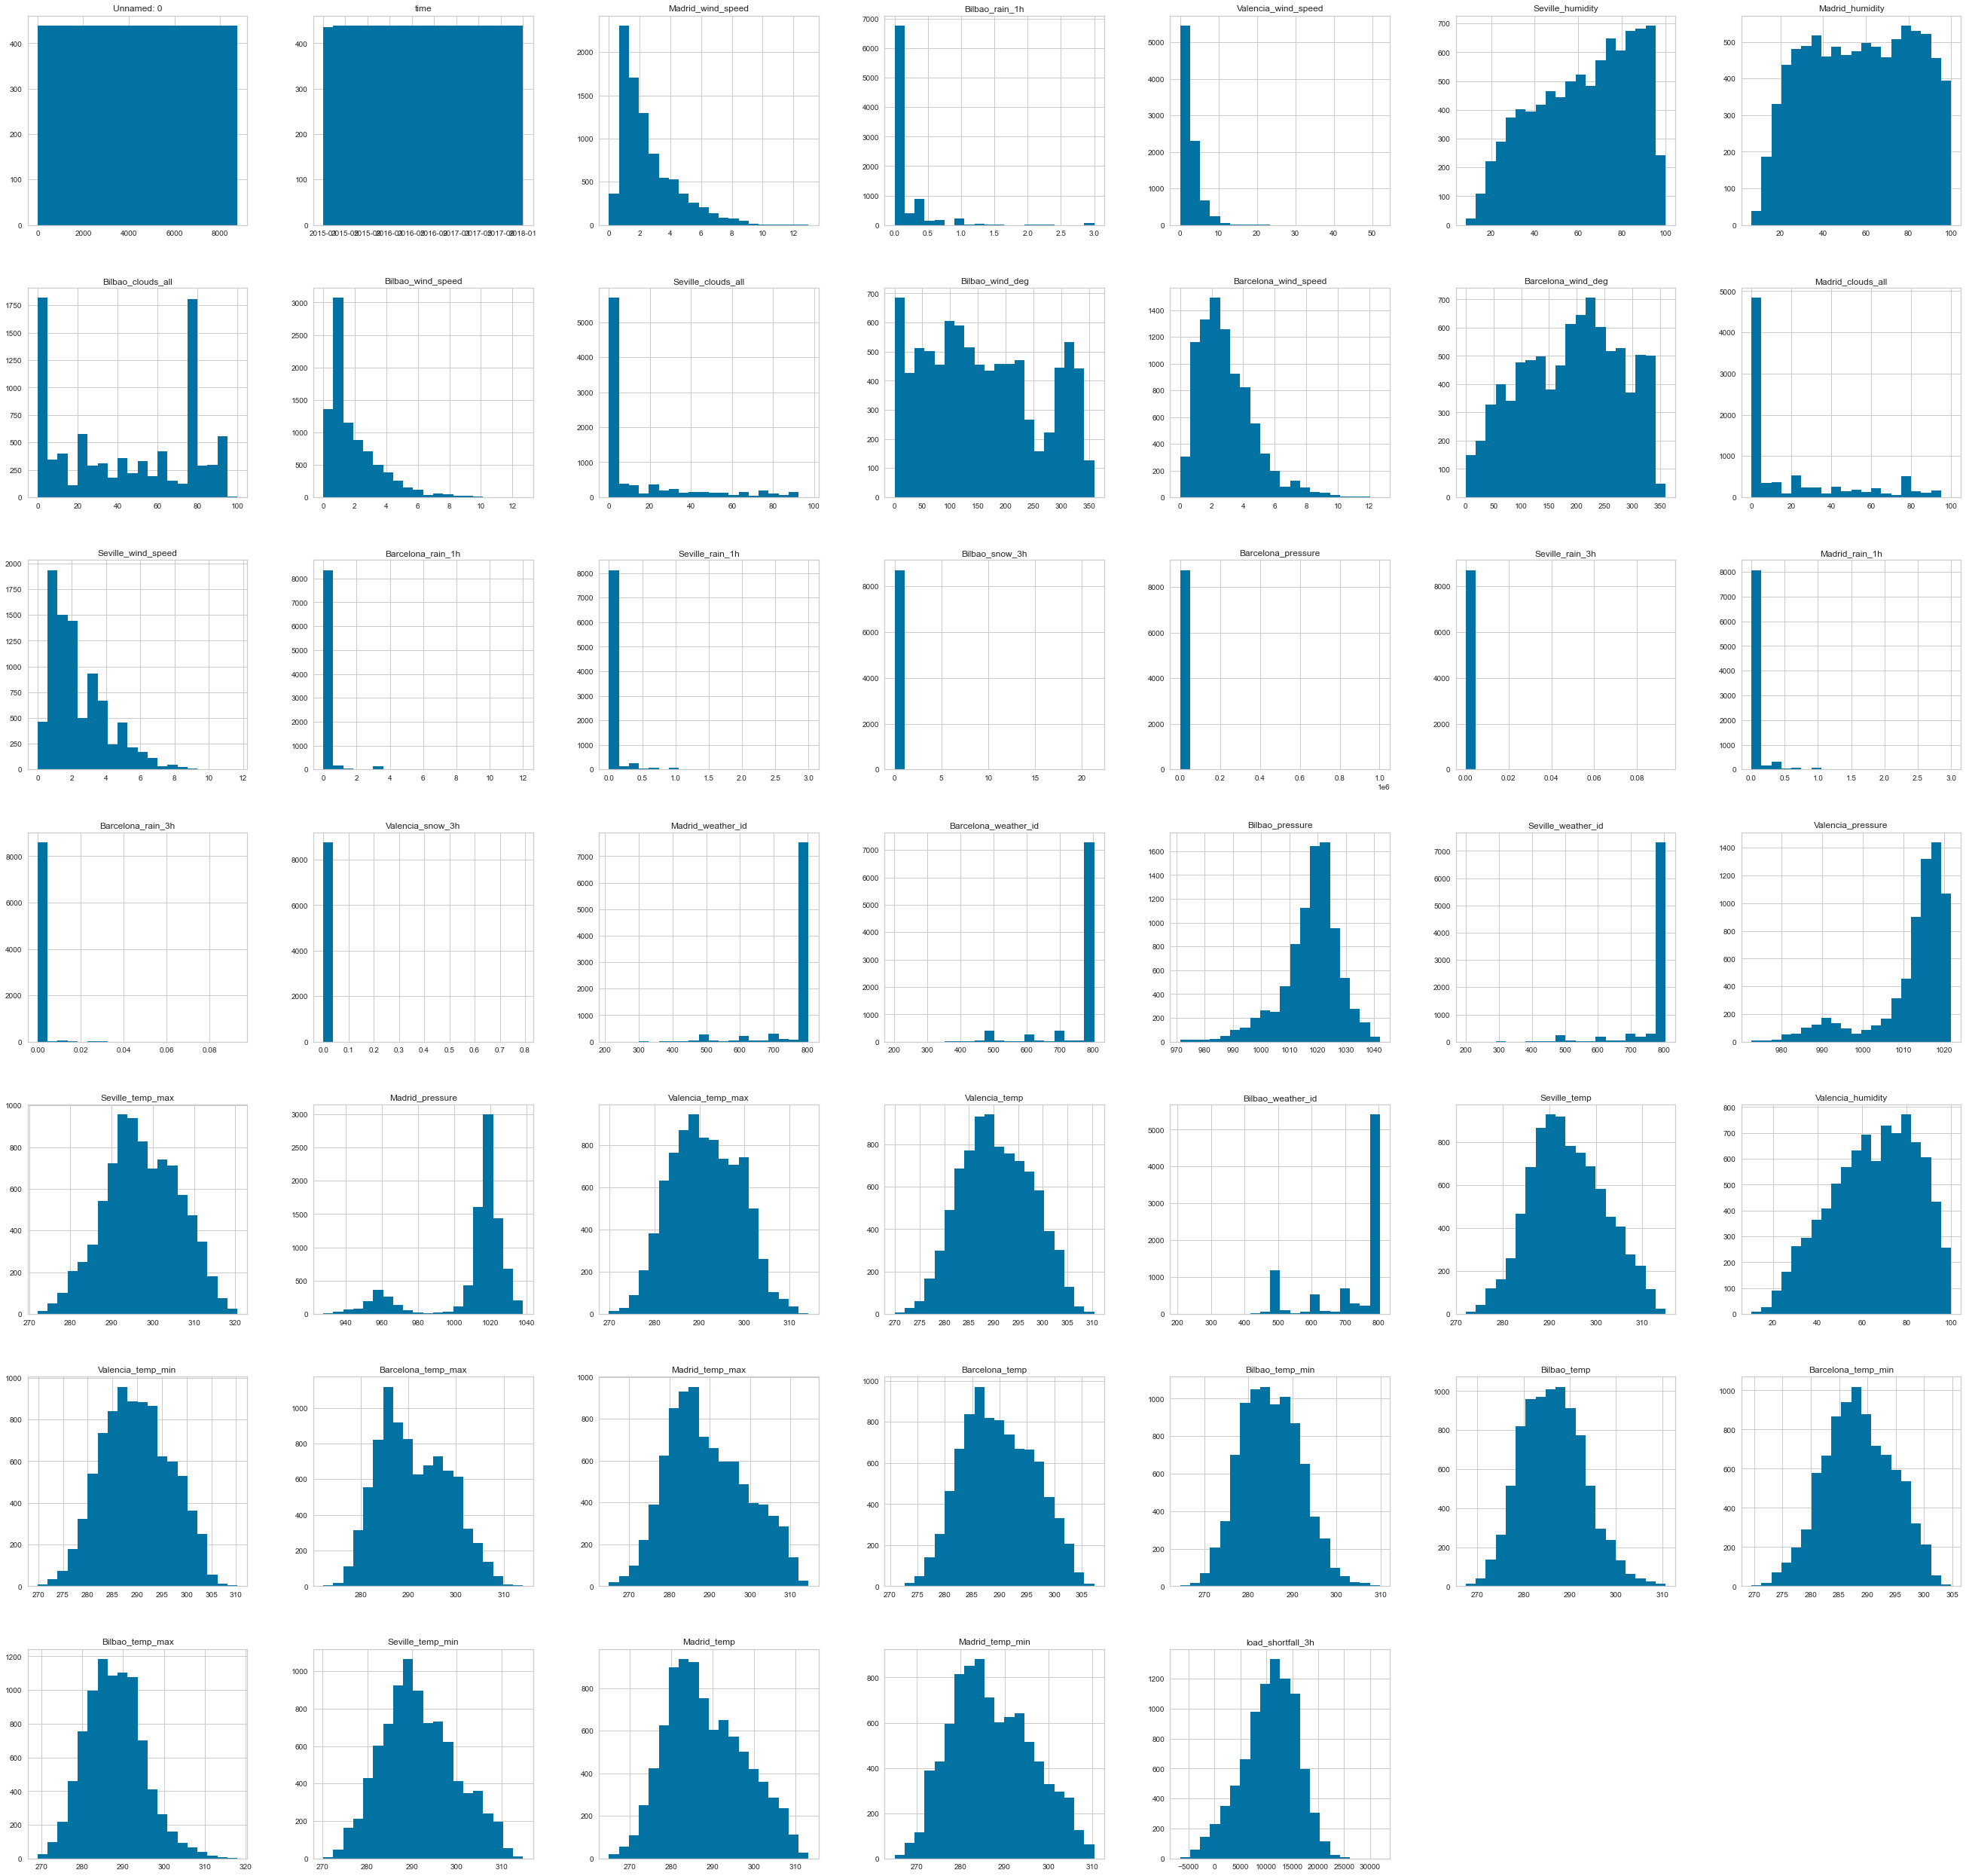

In [21]:
# have a look at feature distributions
df_train.hist(bins=20, figsize=(46, 45)) # Histograms for numerical columns
plt.show()


In [22]:
#Bar graph for average shortfall for different time periods
humidity_data = {
    'Valencia_humidity': df_train['Valencia_humidity'],
    #Humidity data for Barcelona and Bilbao is not int he database
    'Madrid_humidity': df_train['Madrid_humidity']
}

df_humidity = pd.DataFrame(humidity_data)

# Aggregate the averages in humidities of each all cities and create a new 'Average_humidity' column
df_humidity['Average_Humidity'] = df_humidity.mean(axis=1)

#Median tempaerature in Spain 
median_humidity_in_Spain = np.median(df_humidity.Average_Humidity)
print("Median humidity in Spain: ", median_humidity_in_Spain)

Median humidity in Spain:  61.166666666699996


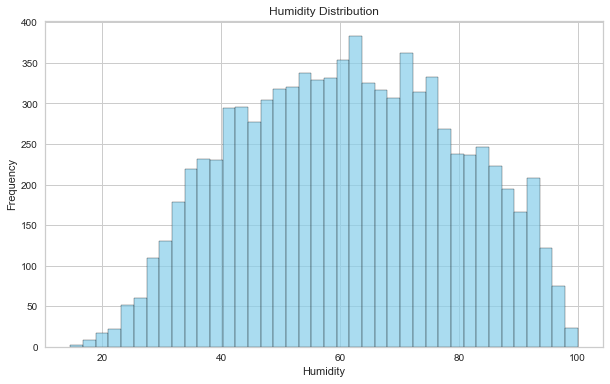

In [23]:
# Create a histogram to see Humidity distribution 
plt.figure(figsize=(10, 6))
sns.histplot(df_humidity.Average_Humidity, bins=40, color='skyblue', alpha=0.7)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.grid(True)
plt.show()

In [24]:
#Average wind speeds in Spain
wind_speed_data = {
    'Valencia_wind_speed': df_train['Valencia_wind_speed'],
    'Barcelona_wind_speed': df_train['Barcelona_wind_speed'],
    'Bilbao_wind_speed': df_train['Bilbao_wind_speed'],
    'Madrid_wind_speed': df_train['Madrid_wind_speed']
}

df_wind_speed = pd.DataFrame(wind_speed_data)

#Aggregate the wind speeds of all cities to create a new column
df_wind_speed['Average_wind_speeds'] = df_wind_speed.mean(axis=1)

#Median wind speed in Spain 
median_wind_in_Spain = np.median(df_wind_speed.Average_wind_speeds)

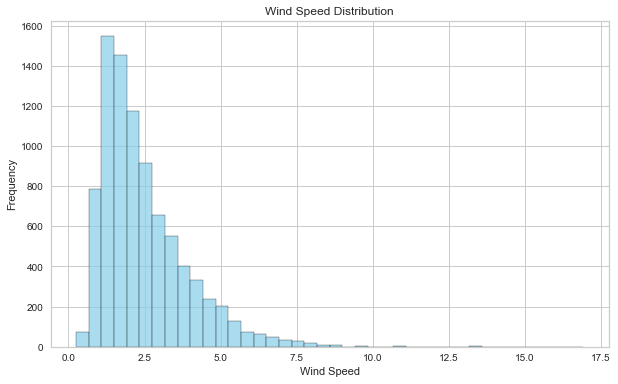

In [25]:
# Create a histogram to see wind speed distribution to see wind speed distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_wind_speed['Average_wind_speeds'], bins=40, color='Skyblue', alpha=0.7)
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Wind Speed Distribution')
plt.grid(True)
plt.show()



> the wind distribution in the wind speed data is positively skewed or rather skewed to the right

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In the quest for modeling excellence, data engineering serves as the workshop where we refine our raw materials.The EDA phase has already provided us with a roadmap, pointing out areas that require attention. In this section, we will roll up our sleeves and transform our dataset into a clean, well-prepared canvas for modeling.
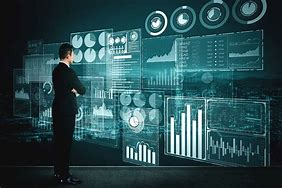
---

### Cleaning the dataset 
- Make sure all data types are valid 
- Make sure there’s no null values , remove corrupt values 
- Correct date formatting 
- Name files appropriately

In [26]:
#Combine two datasets together
df=pd.concat([df_train, df_test], ignore_index=True)

In [27]:
df.shape

(11683, 49)

>The concatenated dataset has 11683 rows of data and 49 features

In [28]:
# remove missing values/ features
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [29]:
#checking for null values in the dataframe
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

missing_data_summary = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data_summary.head()

,Total,Percent
load_shortfall_3h,2920,24.993580
Valencia_pressure,2522,21.586921
Madrid_weather_id,0,0.000000
Bilbao_pressure,0,0.000000
Seville_weather_id,0,0.000000


> Valencia_pressure has missing values that will be cleaned  below

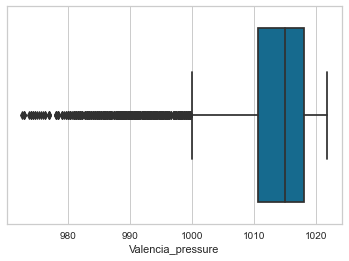

In [30]:
sns.boxplot(x='Valencia_pressure', data=df);

>The data in  Valencia_pressure is skewed to the left (long tail in the left).

In [31]:
#looking into the feature discriptive statistics
print ('Mode')
print (df['Valencia_pressure'].mode())
print ('Mean')
print (df['Valencia_pressure'].mean())
print ('Median')
print (df['Valencia_pressure'].median())

Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Mean
1012.3466870428985
Median
1015.0


In [32]:
# data cleaning begins by renaming our dataframe as df_clean, representing the clean set for model training
df_clean = df


In [33]:
## Dropping the index column as it is unknowndata
df_clean = df_clean.drop(['Unnamed: 0'], axis = 1)

In [34]:
#replacing the valencia_pressure with mode.
df_clean['Valencia_pressure']=df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure']).mode()[0]


In [35]:
#confirming that there are no null values in Valencia pressure
df_clean.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [36]:
#Checking data types
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11683 entries, 0 to 11682
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  11683 non-null  datetime64[ns]
 1   Madrid_wind_speed     11683 non-null  float64       
 2   Valencia_wind_deg     11683 non-null  object        
 3   Bilbao_rain_1h        11683 non-null  float64       
 4   Valencia_wind_speed   11683 non-null  float64       
 5   Seville_humidity      11683 non-null  float64       
 6   Madrid_humidity       11683 non-null  float64       
 7   Bilbao_clouds_all     11683 non-null  float64       
 8   Bilbao_wind_speed     11683 non-null  float64       
 9   Seville_clouds_all    11683 non-null  float64       
 10  Bilbao_wind_deg       11683 non-null  float64       
 11  Barcelona_wind_speed  11683 non-null  float64       
 12  Barcelona_wind_deg    11683 non-null  float64       
 13  Madrid_clouds_al

>Our dataframe shows that it has categorical data. we will now correct the dtypes to float64/int for remaining columns so we only work with numerical data

#### Changing time feature to numeric

In [37]:
#Changing time to numeric`
df_clean['time']

0       2015-01-01 03:00:00
1       2015-01-01 06:00:00
2       2015-01-01 09:00:00
3       2015-01-01 12:00:00
4       2015-01-01 15:00:00
                ...        
11678   2018-12-31 09:00:00
11679   2018-12-31 12:00:00
11680   2018-12-31 15:00:00
11681   2018-12-31 18:00:00
11682   2018-12-31 21:00:00
Name: time, Length: 11683, dtype: datetime64[ns]

In [38]:
#COVERT TIME TO SERIES TIME
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean.time

0       2015-01-01 03:00:00
1       2015-01-01 06:00:00
2       2015-01-01 09:00:00
3       2015-01-01 12:00:00
4       2015-01-01 15:00:00
                ...        
11678   2018-12-31 09:00:00
11679   2018-12-31 12:00:00
11680   2018-12-31 15:00:00
11681   2018-12-31 18:00:00
11682   2018-12-31 21:00:00
Name: time, Length: 11683, dtype: datetime64[ns]

#### Changing Valencia_wind_deg and Seville_pressure  from object to numeric

In [39]:
#Changing Valencia_wind_deg from object to numeric
df_clean['Valencia_wind_deg'] 

0         level_5
1        level_10
2         level_9
3         level_8
4         level_7
           ...   
11678     level_9
11679     level_8
11680     level_6
11681     level_6
11682    level_10
Name: Valencia_wind_deg, Length: 11683, dtype: object

In [40]:
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])
df_clean['Valencia_wind_deg']

0         5
1        10
2         9
3         8
4         7
         ..
11678     9
11679     8
11680     6
11681     6
11682    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

In [41]:
df_clean['Seville_pressure']

0        sp25
1        sp25
2        sp25
3        sp25
4        sp25
         ... 
11678    sp24
11679    sp24
11680    sp23
11681    sp23
11682    sp23
Name: Seville_pressure, Length: 11683, dtype: object

In [42]:
#Changing Valencia_wind_deg from object to numeric
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])
df_clean['Seville_pressure']

0        25
1        25
2        25
3        25
4        25
         ..
11678    24
11679    24
11680    23
11681    23
11682    23
Name: Seville_pressure, Length: 11683, dtype: int64

>Both Valencia wind degree and seville pressure have been corrected to tbe consistent with the rest of the data set.

#### Dropping features with no entries: dropping Bilbao and Valencia snow 

In [43]:
df_clean.drop(['Bilbao_snow_3h', 'Valencia_snow_3h'], axis=1)
df_clean.head(3)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667


## Feature Engineering
Here we engineered  the dataframe with new features: year, month, day,minute, seconds,start_week day and year and seasons. this will help with multivariate analysis. we will analyse the our target variable load shortfall by these new features.

In [44]:
# create new features
#adding new feature for time to be usable in numeric
df_clean['Day'] = df_clean ['time'].dt.day
df_clean['Month'] = df_clean ['time'].dt.month
df_clean['Year'] = df_clean ['time'].dt.year
df_clean['Hour'] = df_clean ['time'].dt.hour
df_clean['Start_minute'] = df_clean ['time'].dt.minute
df_clean['start_seconds'] = df_clean ['time'].dt.second
df_clean['Start_weekend'] = df_clean ['time'].dt.weekday
df_clean['Start_week_of_year'] = df_clean ['time'].dt.isocalendar().week.astype(float)

df_clean.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_min,load_shortfall_3h,Day,Month,Year,Hour,Start_minute,start_seconds,Start_weekend,Start_week_of_year
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,...,265.938000,6715.666667,1,1,2015,3,0,0,3,1.0
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,...,266.386667,4171.666667,1,1,2015,6,0,0,3,1.0


In [45]:
#Adding seasons as new feature
df_clean.loc[df_clean['Month'].isin([1, 2, 3]), ['winter', 'spring', 'summer', 'autumn']] = [1, 0, 0, 0]
df_clean.loc[df_clean['Month'].isin([4, 5, 6]), ['winter', 'spring', 'summer', 'autumn']] = [0, 1, 0, 0]
df_clean.loc[df_clean['Month'].isin([7, 8, 9]), ['winter', 'spring', 'summer', 'autumn']] = [0, 0, 1, 0]
df_clean.loc[df_clean['Month'].isin([10, 11, 12]), ['winter', 'spring', 'summer', 'autumn']] = [0, 0, 0, 1]

df_clean = df_clean.astype({
    'winter': int, 'summer': int, 'spring': int, 'autumn': int
})

#### Multivariate analysis with visuals

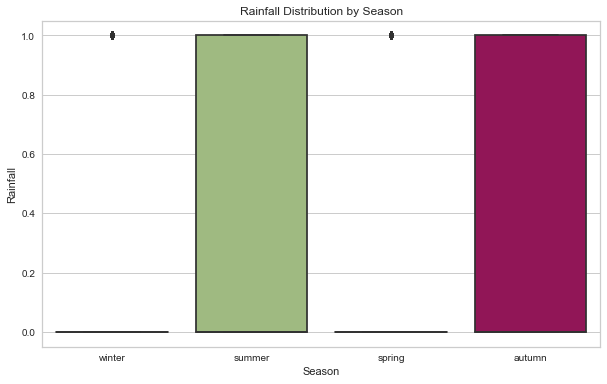

In [46]:
#Analysing rainfall distribution
fig, ax = plt.subplots(figsize=(10, 6))
seasonal_data = df_clean.melt(id_vars=['Year'], value_vars=['winter', 'summer', 'spring', 'autumn'],
                                      var_name='Season', value_name='Rainfall')

# Create the distribution plot
sns.boxplot(x='Season', y='Rainfall', data=seasonal_data, ax=ax)

# Customize labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Rainfall')
plt.title('Rainfall Distribution by Season')
plt.show()

In [47]:
# analysing loadshortfall throught the day

# Average Load Shortfall in the morning(Between 6am and 12 pm):
df['time'] = pd.to_datetime(df['time']) # Convert time column into datetime data type
#Only morning shortfall
morning_shortfall = df[(df['time'].dt.time >= pd.to_datetime('06:00:00').time()) & 
                   (df['time'].dt.time <= pd.to_datetime('12:00:00').time())]
mean_morning_shortfall = morning_shortfall['load_shortfall_3h'].mean()
print("Average load shortfall in the morning: ", mean_morning_shortfall)

# Average Load Shortfall in the afternoon(Between 12pm and 6pm):
df['time'] = pd.to_datetime(df['time']) # Convert time column into datetime data type
#Only afternoon shortfall
afternoon_shortfall = df[(df['time'].dt.time >= pd.to_datetime('12:00:00').time()) & 
                   (df['time'].dt.time <= pd.to_datetime('17:00:00').time())]
mean_afternoon_shortfall = afternoon_shortfall['load_shortfall_3h'].mean()
print("Average load shortfall in the afternoon: ", mean_afternoon_shortfall)

# Average Load Shortfall in the evening(Between 6pm and 9pm):
df['time'] = pd.to_datetime(df['time']) # Convert time column into datetime data type
#Only evening shortfall
evening_shortfall = df[(df['time'].dt.time >= pd.to_datetime('18:00:00').time()) & 
                   (df['time'].dt.time <= pd.to_datetime('21:00:00').time())]
mean_evening_shortfall = evening_shortfall['load_shortfall_3h'].mean()
print("Average load shortfall in the evening: ", mean_evening_shortfall)

# Average Load Shortfall in the night(Between 9pm and 6am):
df['time'] = pd.to_datetime(df['time']) # Convert time column into datetime data type
#Only night shortfall
night_shortfall = df[(df['time'].dt.time >= pd.to_datetime('06:00:00').time()) & 
                   (df['time'].dt.time <= pd.to_datetime('21:00:00').time())]
mean_night_shortfall = night_shortfall['load_shortfall_3h'].mean()
print("Average load shortfall in the night: ", mean_night_shortfall)

Average load shortfall in the morning:  9843.421634225431
Average load shortfall in the afternoon:  12017.565525114158
Average load shortfall in the evening:  11554.366438356163
Average load shortfall in the night:  10723.066798539297


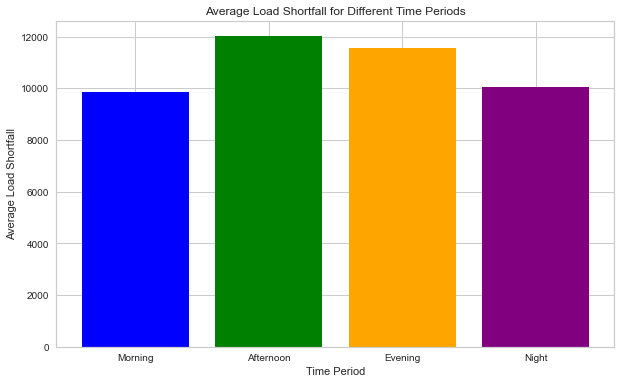

In [48]:
df['time'] = pd.to_datetime(df['time'])

# Define time periods
time_periods = ['Morning', 'Afternoon', 'Evening', 'Night']

# Calculate mean load shortfall for each time period
mean_shortfalls = [
    df[(df['time'].dt.time >= pd.to_datetime('06:00:00').time()) & (df['time'].dt.time <= pd.to_datetime('12:00:00').time())]['load_shortfall_3h'].mean(),
    df[(df['time'].dt.time >= pd.to_datetime('12:00:00').time()) & (df['time'].dt.time <= pd.to_datetime('17:00:00').time())]['load_shortfall_3h'].mean(),
    df[(df['time'].dt.time >= pd.to_datetime('18:00:00').time()) & (df['time'].dt.time <= pd.to_datetime('21:00:00').time())]['load_shortfall_3h'].mean(),
    df[(df['time'].dt.time >= pd.to_datetime('21:00:00').time()) | (df['time'].dt.time <= pd.to_datetime('06:00:00').time())]['load_shortfall_3h'].mean()
]

# Create a bar graph
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(time_periods, mean_shortfalls, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Time Period')
plt.ylabel('Average Load Shortfall')
plt.title('Average Load Shortfall for Different Time Periods')
plt.show()

Average load shortfall through the day :
- Morning:  9843.421634225431
- Afternoon:  12017.565525114158
- Evening:  11554.366438356163
- Night:  10723.066798539297

#### loadshortfall distribution throught the year

In [49]:
#Harvesting  features  and creating a temporary data frame

temp= []
speed= []
rain= []
for col in df_clean.columns:
    if col[-1]=="p" in col:
        temp.append(col)
for col in df_clean.columns:
    if "speed" in col:
        speed.append(col)
for col in df_clean.columns:
    if "rain_3h" in col:
        rain.append(col)

df_clean[temp].head()

,Valencia_temp,Seville_temp,Barcelona_temp,Bilbao_temp,Madrid_temp
0,269.888000,274.254667,281.013000,269.338615,265.938000
1,271.728333,274.945000,280.561667,270.376000,266.386667
2,278.008667,278.792000,281.583667,275.027229,272.708667
3,284.899552,285.394000,283.434104,281.135063,281.895219
4,283.015115,285.513719,284.213167,282.252063,280.678437


In [50]:
temp= []
for col in df_train.columns:
    if col[-1]=="p" in col:
        temp.append(col)
temp.append("Year")
temp.append("Month")
temp.append("load_shortfall_3h")
groupsp= df_clean[temp].groupby(["Year", "Month"], as_index= False).mean()
groupsp["total temp"]=( groupsp["Valencia_temp"]+groupsp["Seville_temp"]+groupsp["Barcelona_temp"]+groupsp["Bilbao_temp"]
                     +groupsp["Madrid_temp"])/5
groupsp.tail(1)

,Year,Month,Valencia_temp,Seville_temp,Barcelona_temp,Bilbao_temp,Madrid_temp,load_shortfall_3h,total temp
47,2018,12,284.499247,284.428986,283.138935,281.925417,279.456822,NaN,282.689881


In [51]:
#group= df_clean[temp].groupby(["Year", "Month"], as_index= False).mean()
groupsp["Year"]= groupsp["Year"].astype("str")
groupsp["Month"]=groupsp["Month"].astype("str")
groupsp["Ym"]= groupsp["Year"]+ "/"+ groupsp["Month"]
groupsp["Ym"].head()

0    2015/1
1    2015/2
2    2015/3
3    2015/4
4    2015/5
Name: Ym, dtype: object

In [118]:
group= df_clean[temp].groupby(["Year", "Month"], as_index= False).mean()
group["Year"]= group["Year"].astype("str")
group["Month"]=group["Month"].astype("str")
group["Ym"]= group["Year"]+ "/"+ group["Month"]
group["Ym"].head()

0    2015/1
1    2015/2
2    2015/3
3    2015/4
4    2015/5
Name: Ym, dtype: object

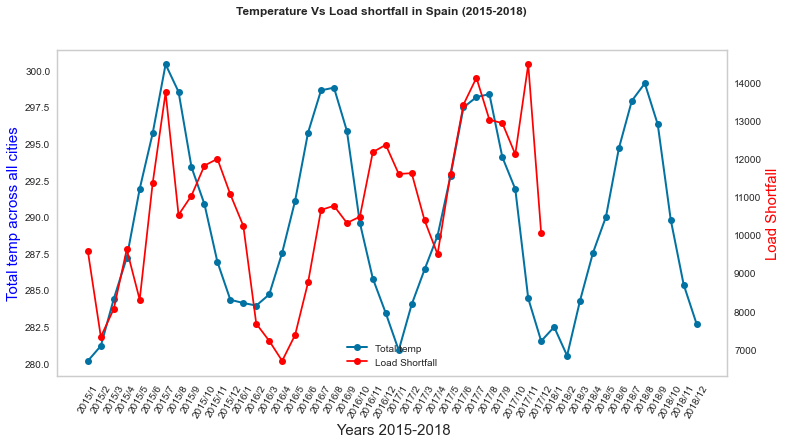

In [52]:
#Plotting temp VS loadshortfall
fig, ax = plt.subplots(figsize=[12, 6])

# Plotting the first line with ax axes
ax.plot(groupsp['Ym'], groupsp["total temp"],
        color='b', linewidth=2, marker='o', label="Total temp")
plt.xticks(rotation=60)
ax.set_xlabel(' Years 2015-2018', fontsize=15)
ax.set_ylabel('Total temp across all cities', color='blue', fontsize=15)

# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(groupsp['Ym'], groupsp['load_shortfall_3h'],
         color='red', marker='o', label="Load Shortfall")

# Combine legends into a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=8)

fig.suptitle('Temperature Vs Load shortfall in Spain (2015-2018)', fontweight="bold")
ax2.set_ylabel('Load Shortfall', color="red", fontsize=15)
ax.grid(False)
ax2.grid(False)

plt.show()

In [91]:
# wind speed
group= df_clean[temp].groupby(["Year", "Month"], as_index= False).mean()
group["Year"]= group["Year"].astype("str")
group["Month"]=group["Month"].astype("str")
group["Ym"]= group["Year"]+ "/"+ group["Month"]

speed= []
for col in df_clean.columns:
    if "speed" in col:
        speed.append(col)
speed
speed.append("Year")
speed.append("Month")
speed.append("load_shortfall_3h")
groupsp= df_clean[speed].groupby(["Year", "Month"], as_index= False).mean()
groupsp["Avg_Wind_speed"]= (groupsp.drop(columns=["Year","Month", "load_shortfall_3h"])).mean(axis=1)

groupsp["Ym"]= group["Ym"]
groupsp.head()

,Year,Month,Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed,load_shortfall_3h,Avg_Wind_speed,Ym
0,2015,1,2.191837,4.776871,1.651701,2.289796,3.004082,9567.351701,2.782857,2015/1
1,2015,2,3.614114,5.929429,1.827327,3.033033,3.241742,7327.774775,3.529129,2015/2
2,2015,3,2.475806,2.579301,1.090054,4.055780,2.393145,8062.243280,2.518817,2015/3
3,2015,4,2.919444,2.290278,1.162500,2.643056,2.408333,9621.084722,2.284722,2015/4
4,2015,5,3.263441,2.067204,1.295699,2.981183,2.778226,8300.656586,2.477151,2015/5


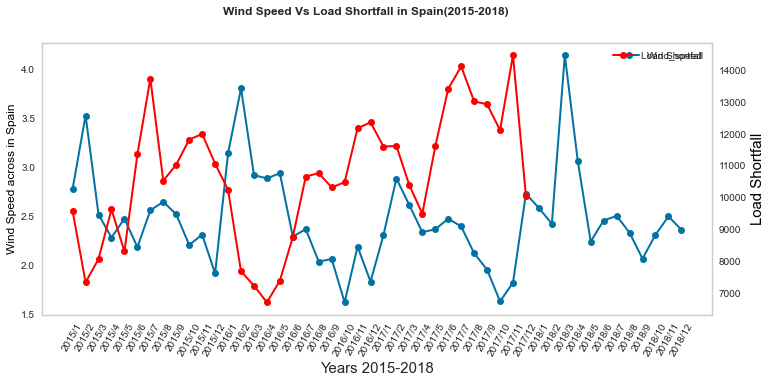

In [92]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(group['Ym'], groupsp["Avg_Wind_speed"],
        color='b', linewidth=2, marker='o', label="Wind_speed")
plt.xticks(rotation=60)
ax.set_xlabel('Years 2015-2018', fontsize=15)
ax.set_ylabel('Wind Speed across in Spain',  color='black', fontsize=12)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(group["Ym"],
         group["load_shortfall_3h"],
         color='red', linewidth=2, marker='o', label="Load Shortfall")
         
ax.legend(loc=1)
ax2.legend(loc=8)
fig.suptitle('Wind Speed Vs Load Shortfall in Spain(2015-2018)', fontweight ="bold")
ax2.set_ylabel('Load Shortfall', color="black",fontsize=15)
ax.grid(False)
ax2.grid(False)
plt.legend()
plt.show()

In [80]:

rain= []
for col in df_clean.columns:
    if "rain_3h" in col:
        rain.append(col)

rain.append("Year")
rain.append("Month")
rain.append("load_shortfall_3h")
rains= df_clean[rain].groupby(["Year", "Month"], as_index= False).mean()
rains["rain_3h"]= (rains.drop(columns=["Year","Month", "load_shortfall_3h"])).mean(axis=1)
rains
# # group["total temp"]=( group["Valencia_temp"]+group["Seville_temp"]+group["Barcelona_temp"]+group["Bilbao_temp"]+group["Madrid_temp"])/5
# # group["total cloud"]= (group["Bilbao_clouds_all"]+group["Seville_clouds_all"]+group["Madrid_clouds_all"])/3
# # group.shape
# #
groupsp["Ym"]= group["Ym"]
groupsp.head(3)

,Year,Month,Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed,load_shortfall_3h,Avg_Wind_speed,Ym
0,2015,1,2.191837,4.776871,1.651701,2.289796,3.004082,9567.351701,2.782857,2015/1
1,2015,2,3.614114,5.929429,1.827327,3.033033,3.241742,7327.774775,3.529129,2015/2
2,2015,3,2.475806,2.579301,1.090054,4.055780,2.393145,8062.243280,2.518817,2015/3


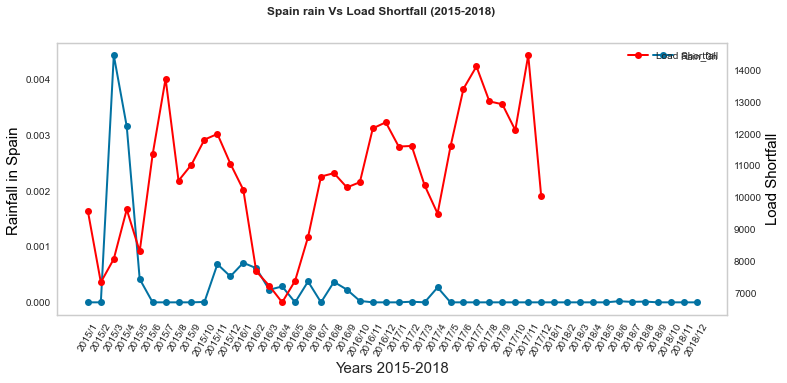

In [85]:
fig, ax = plt.subplots(figsize=[12, 5])

# Plotting the firts line with ax axes
ax.plot(group['Ym'], rains["rain_3h"],
        color='b', linewidth=2, marker='o', label="Rain_3h")
plt.xticks(rotation=60)
ax.set_xlabel('Years 2015-2018', fontsize=15)
ax.set_ylabel('Rainfall in Spain ',  color='black', fontsize=15)
# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(group["Ym"],
         group["load_shortfall_3h"],
         color='red', linewidth=2, marker='o', label="Load Shortfall")
ax2.grid()
ax.legend(loc=1)
ax2.legend(loc=8)
fig.suptitle('Spain rain Vs Load Shortfall (2015-2018)', fontweight ="bold")
ax2.set_ylabel('Load Shortfall', color="black",fontsize=15)
ax.grid(False)
ax2.grid(False)
plt.legend()
plt.show()

#### Fixing the rest of the features to have consistent numeric dataframe
- Seville_ pressure and valencia wind degree from object to numeric


In [93]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11683 entries, 0 to 11682
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  11683 non-null  datetime64[ns]
 1   Madrid_wind_speed     11683 non-null  float64       
 2   Valencia_wind_deg     11683 non-null  int64         
 3   Bilbao_rain_1h        11683 non-null  float64       
 4   Valencia_wind_speed   11683 non-null  float64       
 5   Seville_humidity      11683 non-null  float64       
 6   Madrid_humidity       11683 non-null  float64       
 7   Bilbao_clouds_all     11683 non-null  float64       
 8   Bilbao_wind_speed     11683 non-null  float64       
 9   Seville_clouds_all    11683 non-null  float64       
 10  Bilbao_wind_deg       11683 non-null  float64       
 11  Barcelona_wind_speed  11683 non-null  float64       
 12  Barcelona_wind_deg    11683 non-null  float64       
 13  Madrid_clouds_al

In [94]:
df_clean['Valencia_wind_deg']=df_clean['Valencia_wind_deg'].astype(float)

In [95]:
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].astype(float)

In [96]:
# #confirm no nan values
df_clean['Valencia_pressure'].isnull().sum()

0

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- With our data well-prepared and our insights honed, we are now at the doorstep of predictive modeling. In this phase, we'll harness the power of regression models to forecast the three-hour load shortfall – a pivotal piece of the puzzle in maintaining a stable energy grid.
- The goal is clear: we aim to build one or more regression models that are not just capable but accurate. These models will utilize the patterns and relationships we've uncovered in our data to make precise predictions about electricity shortfalls.
- Our toolkit includes regression algorithms like Linear Regression, Random Forest Regression, and Support Vector Regression. We'll experiment with these models, fine-tuning their parameters, and evaluating their performance using metrics like Mean Squared Error (MSE) and R-squared (R²).
- With modeling, we bridge the gap between data and insights, turning numbers into actionable information. Let's embark on this journey to create models that will help us navigate the complexities of Spain's energy landscape.

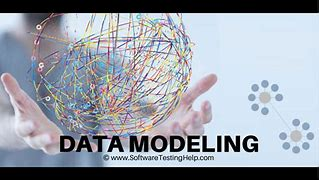
---

#### Splitting the Data: 
- divide our dataset into two parts: one for training the models and another for testing their performance.
- it is to ensure that our models can generalize well to unseen data.

In [136]:
# split data
y = df_clean[:len(df_train)]['load_shortfall_3h']
x = df_clean[:len(df_train)].drop(['load_shortfall_3h', 'time'], axis =1)

In [137]:
x.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Year,Hour,Start_minute,start_seconds,Start_weekend,Start_week_of_year,winter,spring,summer,autumn
0,0.666667,5.0,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,...,2015,3,0,0,3,1.0,1,0,0,0
1,0.333333,10.0,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,...,2015,6,0,0,3,1.0,1,0,0,0


In [138]:
#target variable
y.head(2)

0    3354.471355
1    1088.935613
Name: load_shortfall_3h, dtype: float64

### Scaling data with Standard scaler
Scaling is important because it ensures that all features contribute equally to the model's performance, preventing certain features from dominating the others due to differences in their scales. we used the ScikitStandard scaler

In [139]:
# Convert 'x' to a NumPy array
x_array = x.values

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)

In [140]:
# set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

### Feature selection (pre-processing)
using LGBM regressor we perform feature selection and checking feature importance

In [102]:
#lightGBM model fit
gbm = lgb.LGBMRegressor()
gbm.fit(x, y)
gbm.booster_.feature_importance()

# importance of each attribute
feat_imp_ = pd.DataFrame({'columns':x.columns, 'fea_imp':gbm.feature_importances_})
feat_imp_.loc[feat_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

,columns,fea_imp
46,Day,454
53,Start_week_of_year,224
49,Hour,218
52,Start_weekend,152
25,Bilbao_pressure,139
18,Barcelona_pressure,127
34,Valencia_humidity,91
48,Year,88
0,Madrid_wind_speed,79
29,Madrid_pressure,77


#### Recursive Feature Elimination(RFE
Recursive Feature Elimination (RFE) is a feature selection technique used in machine learning to iteratively remove the least important features from a model. The goal of RFE is to improve the model's performance by selecting a subset of the most relevant features, reducing dimensionality, and potentially enhancing model interpretability

In [103]:
# create the RFE model and select top ranked attributes
rfe = RFE(gbm)
rfe = rfe.fit(x, y)

# summarize the ranking of the attributes
pd.set_option('display.max_rows', 61)
feat_rank_ = pd.DataFrame({'columns':x.columns, 'fea_rank':rfe.ranking_})
feat_rank_.loc[feat_rank_.fea_rank <= feature_selection_threshold].sort_values(by=['fea_rank'], ascending = True)

,columns,fea_rank
0,Madrid_wind_speed,1
49,Hour,1
48,Year,1
47,Month,1
46,Day,1
45,Madrid_temp_min,1
43,Seville_temp_min,1
42,Bilbao_temp_max,1
41,Barcelona_temp_min,1
39,Bilbao_temp_min,1


#### Assigning most important features for modelling

In [104]:
#assigning most important features for modelling

#create list of column names
top_feat_list = feat_rank_.loc[feat_rank_.fea_rank <= 1]['columns'].tolist()

#assign dataframe columns for modelling
train_X_sel = x[top_feat_list]
test_X_sel = df_clean[top_feat_list]

In [105]:
best_model_select = setup(data=train_X_sel, target=y)

,Description,Value
0,Session id,7349
1,Target,load_shortfall_3h
2,Target type,Regression
3,Original data shape,"(8763, 30)"
4,Transformed data shape,"(8763, 30)"
5,Transformed train set shape,"(6134, 30)"
6,Transformed test set shape,"(2629, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


#### Best model selection using Pycaret:
PyCaret is a Python library designed to automate various aspects of the machine learning workflow, including data preprocessing, model selection and hyperparameter tuning

In [106]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1910.7894,6597654.8296,2566.4627,0.7582,0.5218,0.6645,1.9820
xgboost,Extreme Gradient Boosting,1963.7314,7031407.3000,2649.1696,0.7425,0.5233,0.7295,0.1850
lightgbm,Light Gradient Boosting Machine,1999.8147,7085969.3132,2660.0128,0.7399,0.5257,0.7994,0.1210
et,Extra Trees Regressor,2010.9673,7210433.1505,2683.6742,0.7355,0.5299,0.9526,0.8770
rf,Random Forest Regressor,2104.5065,7778169.2381,2787.4744,0.7146,0.5371,0.8083,1.7790
gbr,Gradient Boosting Regressor,2495.1779,10303831.3421,3208.0998,0.6224,0.5738,0.9887,0.6900
dt,Decision Tree Regressor,2942.9354,16395912.2120,4046.4510,0.3965,0.6832,1.0232,0.0590
ada,AdaBoost Regressor,3470.2373,17725142.8681,4209.1643,0.3498,0.6588,1.6145,0.3090
lasso,Lasso Regression,3760.8990,22663202.2997,4759.8386,0.1687,0.7418,2.0054,0.0360
br,Bayesian Ridge,3760.1394,22664695.8800,4759.9507,0.1687,0.7426,2.0312,0.0150


### Training models 
Experimenting with different regression algorithms, such as Linear Regression, Random Forest Regression, and Decision. Train and fine-tune these models using your training data

In [107]:
#function to return the rmse for models:
def get_rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [108]:
%%time
#modelling with the LGBMRegressor 
LGBmodel = lgb.LGBMRegressor()
LGBmodel.fit(x, y)
y_pred_lgb = LGBmodel.predict(x_test)
get_rmse(y_test, y_pred_lgb)

CPU times: user 2.98 s, sys: 623 ms, total: 3.61 s
Wall time: 641 ms


2012.0185357124894

In [109]:
%%time
#modelling with the RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=num_estimators, random_state=random_state_global, n_jobs=-1)
rfr_model.fit(x, y)
y_pred_rfr = rfr_model.predict(x_test)
get_rmse(y_test, y_pred_rfr)

CPU times: user 35 s, sys: 149 ms, total: 35.2 s
Wall time: 4.87 s


968.5279820321706

In [110]:
%%time
#modelling with the ExtraTreesRegressor
etr_model = ExtraTreesRegressor(n_estimators=10, random_state=random_state_global, n_jobs=-1)
etr_model.fit(x, y)
y_pred_etr = etr_model.predict(x_test)
get_rmse(y_test, y_pred_etr)

CPU times: user 1.24 s, sys: 23 ms, total: 1.26 s
Wall time: 309 ms


1.4546180914636451e-12

In [111]:
#selecting the model with the best rmse from LGB Regressor with training data
model_list = [LGBmodel, rfr_model, etr_model]
best_model = None
best_rmse = 3000
for model in model_list:
    model.fit(x, y)
    pred = model.predict(x_test)
    rmse = get_rmse(y_test, y_pred_lgb)
    if rmse < best_rmse:
        best_model = LGBmodel
        best_rmse = round(rmse, 6)
        print(f'The best model is: {best_model} with RSME of {best_rmse}')

The best model is: LGBMRegressor() with RSME of 2012.018536
The best model is: LGBMRegressor() with RSME of 2012.018536
The best model is: LGBMRegressor() with RSME of 2012.018536


In [112]:
#fitting and returning the best model values for submission
best_model = best_model.fit(train_X_sel, y)
y_pred_best = best_model.predict(test_X_sel)
y_pred_best

array([ 3354.47135451,  1088.93561316,  3824.81565472, ...,
       14259.04843772, 13809.0979237 , 16182.58115531])

In [113]:
#create load_shortfall_3h column
test_time = df_clean
test_time['load_shortfall_3h'] = y_pred_best.tolist()

#subset columns for output format
df_final_sub = test_time[['time', 'load_shortfall_3h']]
df_final_sub.drop_duplicates(subset='time', keep='first', inplace=True, ignore_index=False)

#Export data to csv
df_final_sub.to_csv('LGB_prediction.csv', index=False)

#### Testing normal Randorm forest, linear regression and Decision tree

In [114]:
# Our forest consists of 100 trees with a max depth of 22 which was created and optimal model

RF = RandomForestRegressor(n_estimators=100, max_depth=22)

RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=22)

In [115]:
from sklearn.metrics import mean_squared_error
# Get prediction
y_pred = RF.predict(x_test)

In [116]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 2691.378824676588


In [120]:
from sklearn.metrics import r2_score
RF_R2=r2_score(y_test,y_pred)

In [121]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=22, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=22, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=22, random_state=23)

In [122]:
forest_1.fit(x_train, y_train)
forest_2.fit(x_train, y_train)
forest_3.fit(x_train, y_train)

RandomForestRegressor(max_depth=22, random_state=23)

In [141]:
# Fit regression decision tree model
DT = DecisionTreeRegressor(max_depth=20)
DT.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=20)

In [142]:
# Fit linear regression model
LR = LinearRegression(fit_intercept=True)
LR.fit(x_train,y_train)

LinearRegression()

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### Evaluate One or More ML Models:
- Once our models are trained, we evaluate their performance.
- Use metrics like Mean Squared Error (MSE) and R-squared (R²) to assess how well our models predict the three-hour load shortfall. 
- This evaluation will help us identify the model(s) that perform best for our specific task.
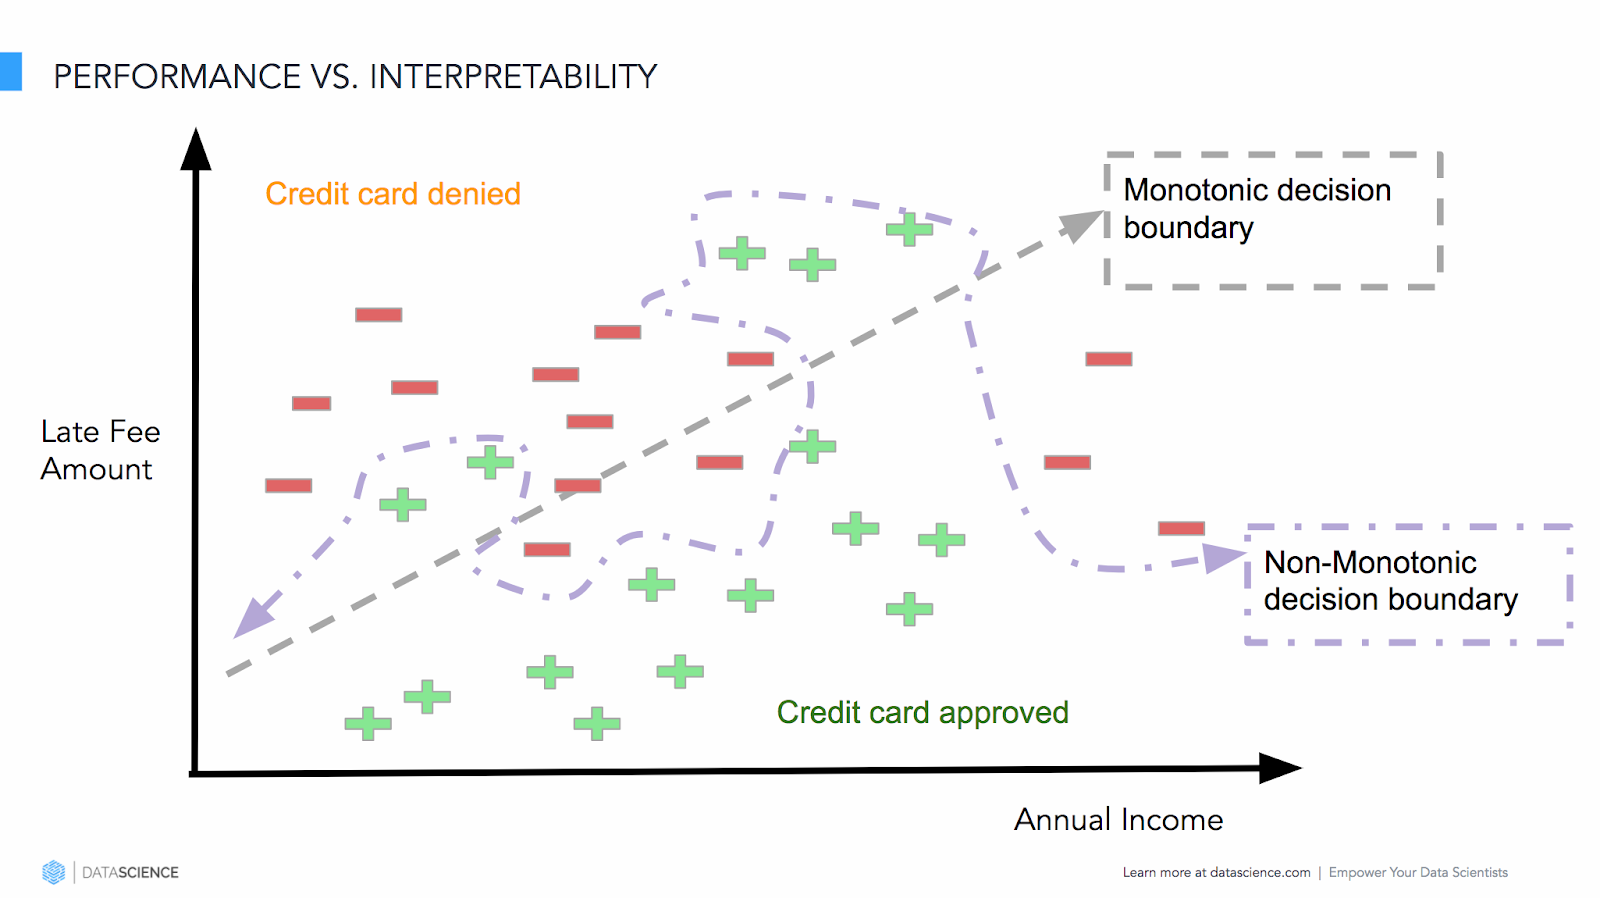
---

#### Model performance looking at the R-Squared

In [143]:
DT_pred = DT.predict(x_test)
DT_R2 = r2_score(y_test, DT_pred)

In [144]:
LR_pred = LR.predict(x_test)
LR_R2 = r2_score(y_test, LR_pred)

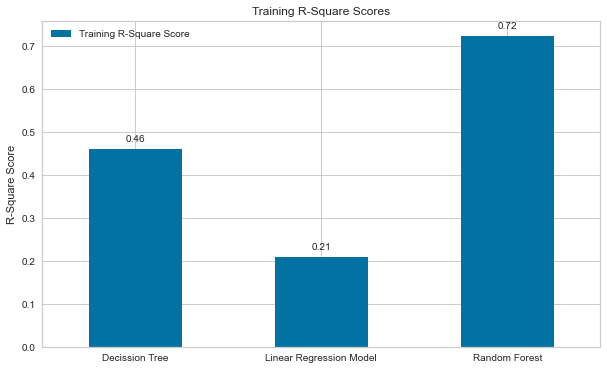

In [127]:
results_dict = {'Training R-Square Score':
                        {
                            "Linear Regression Model": LR_R2,
                            "Decission Tree": DT_R2,
                            "Random Forest": RF_R2
                        }
               }

results_df = pd.DataFrame(data=results_dict)
ax = results_df.plot.bar(rot=0, figsize=(10, 6))
plt.title('Training R-Square Scores')
plt.ylabel('R-Square Score')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [128]:
results_df

,Training R-Square Score
Decission Tree,0.462063
Linear Regression Model,0.209870
Random Forest,0.723830


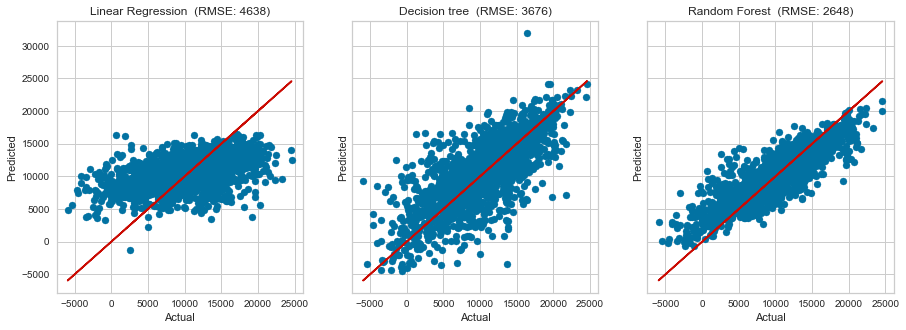

In [176]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [LR.predict(x_test), DT.predict(x_test), RF.predict(x_test)]
title = ['Linear Regression','Decision tree', 'Random Forest']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

### Other models

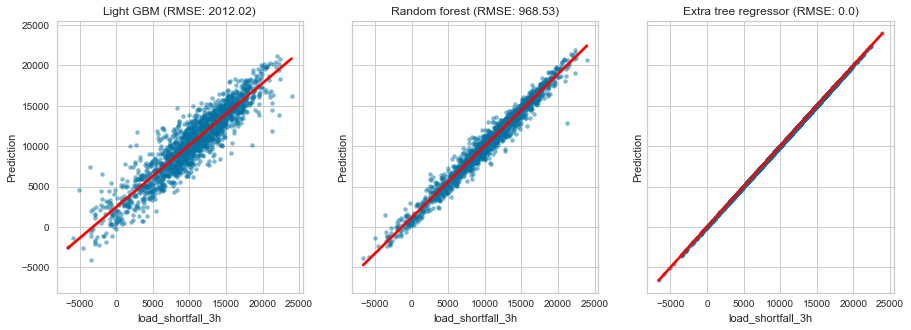

In [119]:
fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)
predictions = [y_pred_lgb, y_pred_rfr, y_pred_etr]
titles = ['Light GBM', 'Random forest', 'Extra tree regressor']

# For loop through all the predictions and plot each prediction
for p in range(3):
    rmse = round(np.sqrt(mean_squared_error(predictions[p], y_test)), 2)
    ax[p].set_title(titles[p] + " (RMSE: " + str(rmse) + ")")
    ax[p].set_ylabel('Prediction')
    ax[p].set_xlabel('Actual value')
    
    # Plot scatter plot with a regression line
    sns.regplot(x=y_test, y=predictions[p], ax=ax[p], scatter_kws={'s': 20, 'alpha': 0.5},
                line_kws={'color': 'red'})
    
    
plt.show()

### MAKING SUBMISSION 

In [129]:
# for Submission
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h',axis=1)

In [146]:
pred_y = pd.DataFrame(LR_pred, columns = ['load_shortfall_3h'])
pred_y.head()

,load_shortfall_3h
0,13616.585999
1,6198.505958
2,6810.152101
3,12671.837247
4,12679.978135


In [291]:
# Decission Tree
DT.fit(x_train, y)
DT_pred = DT.predict(x_test)

In [292]:
pred_ry= pd.DataFrame(DT_pred,columns= ['load_shortfall_3h'])
pred_ry.head()

,load_shortfall_3h
0,11724.333333
1,10656.000000
2,7226.666667
3,13440.666667
4,17491.333333


In [293]:
#LGB model
y_pred_lgb= pd.DataFrame(y_pred_lgb,columns= ['load_shortfall_3h'])
y_pred_lgb.head()

,load_shortfall_3h
0,12804.268676
1,10300.340106
2,10177.803484
3,12465.115848
4,11616.824360


In [294]:
#Random Forest Regression
RF.fit(x_train, y)
RF_pred = RF.predict(x_test)

In [295]:
pred_RF= pd.DataFrame(RF_pred,columns= ['load_shortfall_3h'])
pred_RF.head()

,load_shortfall_3h
0,10383.686667
1,8803.813333
2,7621.313333
3,10471.733333
4,12826.393333


In [302]:
output_RF=output_RF = pd.DataFrame({'time':df_test['time']})
submission_RF = output_RF.join(pred_RF)
submission_RF.to_csv('team_submission_Rf.csv', index = False)

In [303]:
submission_RF

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10383.686667
1,2018-01-01 03:00:00,8803.813333
2,2018-01-01 06:00:00,7621.313333
3,2018-01-01 09:00:00,10471.733333
4,2018-01-01 12:00:00,12826.393333
...,...,...
2915,2018-12-31 09:00:00,13890.150000
2916,2018-12-31 12:00:00,15134.660000
2917,2018-12-31 15:00:00,15499.933333
2918,2018-12-31 18:00:00,15468.750000


In [ ]:
output_RFr=output_RF = pd.DataFrame({'time':df_test['time']})
submission_RFr = output_RF.join(y_pred_rfr)
submission_RFr.to_csv('team_submission_Rfr.csv', index = False)

In [ ]:
submission_RFr

### Submitting lgb models

In [129]:
#fitting and returning the best model values for submission
best_model = best_model.fit(train_X_sel, y)
y_pred_best = best_model.predict(test_X_sel)
y_pred_best

array([ 3354.47135451,  1088.93561316,  3824.81565472, ...,
       14259.04843772, 13809.0979237 , 16182.58115531])

In [137]:
outputLGBMODEL = pd.DataFrame({'time':df_test['time']})
submission_LGBm = outputLGBMODEL.join(y_pred_lgb)
submission_LGBm.to_csv('LGB_submission.csv',index = False)

In [138]:
submission_LGBm

,time,load_shortfall_3h
0,2018-01-01 00:00:00,14524.775960
1,2018-01-01 03:00:00,7239.452539
2,2018-01-01 06:00:00,11178.868926
3,2018-01-01 09:00:00,9748.278941
4,2018-01-01 12:00:00,13665.773588
...,...,...
2915,2018-12-31 09:00:00,NaN
2916,2018-12-31 12:00:00,NaN
2917,2018-12-31 15:00:00,NaN
2918,2018-12-31 18:00:00,NaN


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

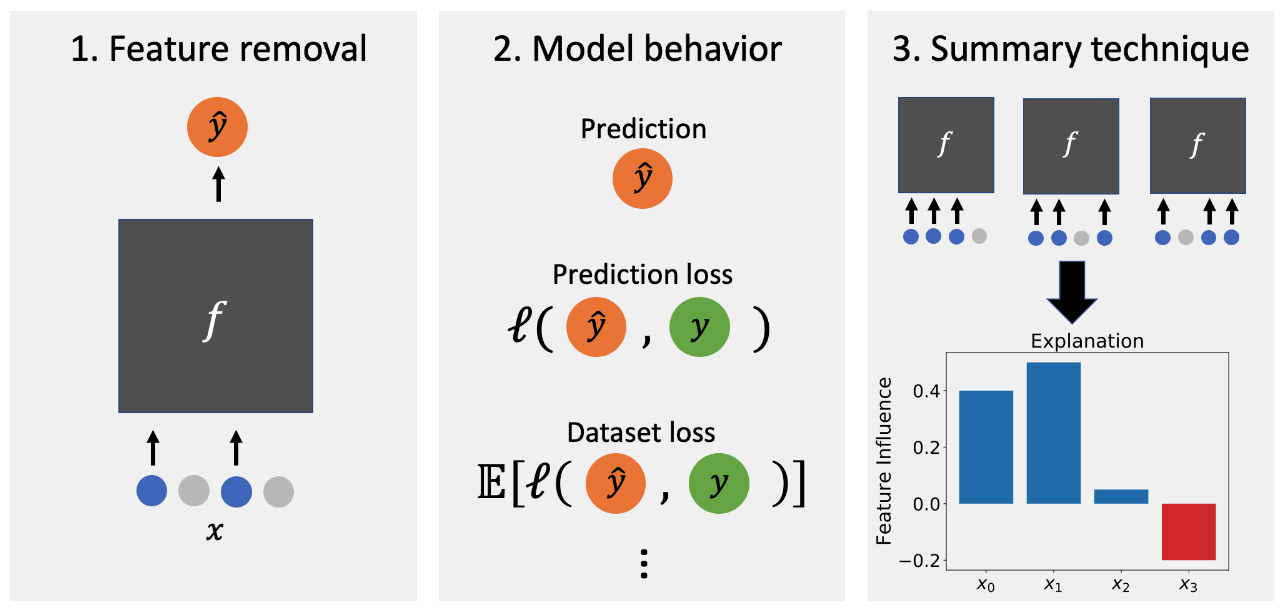
---

## How do Random Forests Work?

### 1. Fitting data:
_N_ refers to the number of observations (rows) in the training dataset, and _p_ the number of predictor variables (columns). The following is the typical algorithm for a Random Forest:

1. **Bootstrapping**: Drawing with replacement from the training dataset, randomly sample _N_ observations.
2. Use the _N_ observations to grow a random forest tree as follows:<br>
_<br>
At each node:<br>
i. Select a random subset, $m$, of predictor variables, where $m<\sqrt{p}$.<br>
ii. Pick the best variable/split-point among the selected predictor variables.<br>
iii. Divide data into two subsets based on the selected split.<br>
iv. Repeat until stopping criteria satisfied (e.g. minimum node sample size reached)._
<br>
3. Repeat until desired number of random forest trees is reached.


### 2. Making Predictions:


Random forests combine multiple trees to make a prediction as follows:
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/random_forest.png">


Based on our EDA, a number of features were non-linear when plotted. This was clear indication that the data would perform poorly when linearly fitted. From our results, linear model performed RMSE 4638.47.
 
In summary, Random Forests work by creating an ensemble of decision trees, each trained on a different subset of data and variables. The collective wisdom of these trees provides a more stable and accurate prediction, making Random Forests a powerful machine learning technique.